In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [4]:
df=pd.read_csv("Churn.csv")

In [5]:
x=pd.get_dummies(df.drop(['Churn','Customer ID'], axis=1), dtype=float)
y=df['Churn'].apply(lambda x:1 if x=='Yes' else 0)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [7]:
y_train.head()

2653    0
1112    1
1742    0
3027    1
1883    0
Name: Churn, dtype: int64

In [8]:
x_train.head()

,Senior Citizen,tenure,Monthly Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Total Charges_995.35,Total Charges_996.45,Total Charges_996.85,Total Charges_996.95,Total Charges_997.65,Total Charges_997.75,Total Charges_998.1,Total Charges_999.45,Total Charges_999.8,Total Charges_999.9
2653,0,1,55.55,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1112,0,4,94.40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,0,16,71.40,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3027,0,16,84.95,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1883,0,29,60.20,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score


In [10]:
model=Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(x_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [60]:
history=model.fit(x_train, y_train, epochs=30, batch_size=32)

Train on 5635 samples
Epoch 1/30
5635/5635 [==============================] - 1s 209us/sample - loss: 0.4106 - acc: 0.7998
Epoch 2/30
5635/5635 [==============================] - 1s 189us/sample - loss: 0.4093 - acc: 0.8048
Epoch 3/30
5635/5635 [==============================] - 1s 190us/sample - loss: 0.4093 - acc: 0.8053
Epoch 4/30
5635/5635 [==============================] - 1s 184us/sample - loss: 0.4100 - acc: 0.8014
Epoch 5/30
5635/5635 [==============================] - 1s 182us/sample - loss: 0.4083 - acc: 0.8082
Epoch 6/30
5635/5635 [==============================] - 1s 182us/sample - loss: 0.4104 - acc: 0.8030
Epoch 7/30
5635/5635 [==============================] - 1s 191us/sample - loss: 0.4109 - acc: 0.8002
Epoch 8/30
5635/5635 [==============================] - 1s 188us/sample - loss: 0.4090 - acc: 0.8034
Epoch 9/30
5635/5635 [==============================] - 1s 187us/sample - loss: 0.4113 - acc: 0.8055
Epoch 10/30
5635/5635 [==============================] - 1s 186us/sam

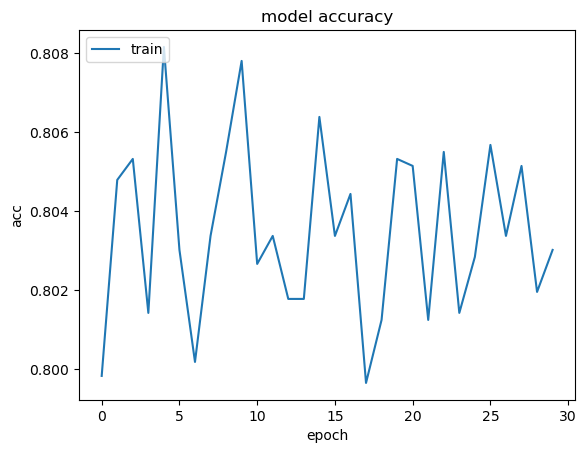

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


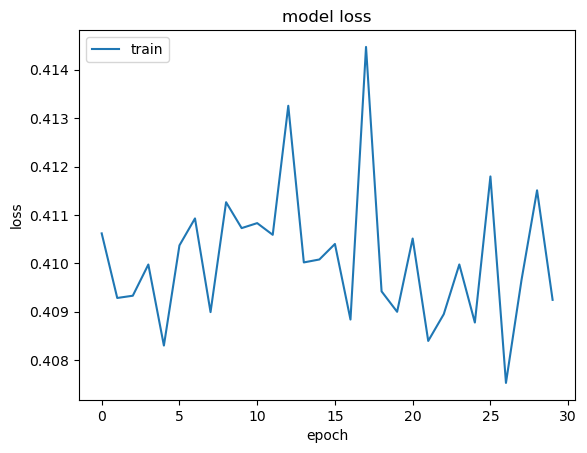

In [62]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
y_hat=model.predict(x_test)
y_hat=[0 if x<0.5 else 1 for x in y_hat]

In [70]:
loss, acc=model.evaluate(x_test, y_test, batch_size=100, verbose=1) 
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {acc}")


Test Loss: 0.4274816704270178
Test Accuracy: 0.8105039000511169


In [69]:
accuracy_score(y_test,y_hat)

0.808374733853797

In [37]:
model.save('tfmodel')